# Clasificación binaria lineal

En este cuaderno se introducen por primera vez diferentes modelos, de momento lineales y para clasificación binaria.

---
    [ES] Código de Alfredo Cuesta Infante para 'Reconocimiento de Patrones'
       @ Master Universitario en Visión Artificial, 2024, URJC (España)
    [EN] Code by Alfredo Cuesta-Infante for 'Pattern Recognition'
       @ Master of Computer Vision, 2024, URJC (Spain)

    alfredo.cuesta@urjc.es

## Imports & Cargar datos

Para acortar el cuaderno, cargaremos los ficheros CSV que se crearon en el cuaderno anterior <br>
("Train_0vs1_2D.csv" y "Test_0vs1_2D.csv")

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.svm import LinearSVC, NuSVC, LinearSVR, NuSVR, SVC
import matplotlib.pyplot as plt
#########################################################################

file_path = "../datasets/0vs1/"
Xtrain_filename = "Train_0vs1_2D.csv"
Xtest_filename  = "Test_0vs1_2D.csv"

[TrainStr, TestStr] = [file_path+Xtrain_filename, file_path+Xtest_filename]
TrainSet = pd.read_csv(TrainStr, sep=';', decimal='.')
TestSet  = pd.read_csv(TestStr,  sep=';', decimal='.')

X_train = TrainSet.drop(columns=['target'])
y_train = TrainSet['target']
X_test = TestSet.drop(columns=['target'])
y_test = TestSet['target']

## Modelos lineales que se pueden probar

from sklearn.linear_model import 
 - LinearRegression, 
 - LogisticRegression, 
 - Perceptron
 
from sklearn.svm import 
 - LinearSVC, 
 - NuSVC, 
 - LinearSVR, 
 - NuSVR

In [14]:
theta = 0 #<- threshold to make a decision about the label

model_type = 'LinearSVC'
# Model choices are: 
#   LinearRegression, LogisticRegression,
#   Perceptron,
#   LinearSVC, LinearSVR, NuSVC, NuSVR
model = eval(model_type+'()')

def decision_surf2D(x,w,w0,theta):
    # __ decision surface for 2D data points __
    # x is the first component of a dataset
    # w is the array of weights
    # w0 is the independent term (interception)
    # theta is the threshold
    # -> returns the second component 
    w=w.ravel()
    aux = theta-w0-w[0]*x
    return aux/w[1]

def discriminant(y,theta):
    # __ Discriminant function __
    y[y>theta] = 1
    y[y<=theta] = 0 
    return y

## Aprendizaje del modelo con los datos de entrenamiento

In [15]:
model.fit(X_train, y_train)
yhat_train = pd.DataFrame(model.predict(X_train), columns=['yhat'])
yhat_train = discriminant(yhat_train,theta)
model.__dict__

{'dual': 'auto',
 'tol': 0.0001,
 'C': 1.0,
 'multi_class': 'ovr',
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'verbose': 0,
 'random_state': None,
 'max_iter': 1000,
 'penalty': 'l2',
 'loss': 'squared_hinge',
 'feature_names_in_': array(['locallylinearembedding0', 'locallylinearembedding1'], dtype=object),
 'n_features_in_': 2,
 'classes_': array([0, 1], dtype=int64),
 'coef_': array([[  7.30385074, -11.98351377]]),
 'intercept_': array([0.10749706]),
 'n_iter_': 1}

## Visualizaciones
En vez de utilizar el conjunto de test para hacer inferencia, 
utilizo:
1. El conjunto de train con las etiquetas verdaderas para mostrar los errores que el clasificador lineal comete sobre el conjunto de entrenamiento
1. Un barrido del espacio donde viven los ejemplos de entrenamiento 

C:\Users\alfredo.cuesta\AppData\Local\Temp\ipykernel_15932\753261109.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interval = [ mins[0], maxs[0], mins[1], maxs[1] ]
C:\Users\alfredo.cuesta\AppData\Local\Temp\ipykernel_15932\753261109.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rangeX = np.linspace(mins[0],maxs[0],Ngrid)
C:\Users\alfredo.cuesta\AppData\Local\Temp\ipykernel_15932\753261109.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

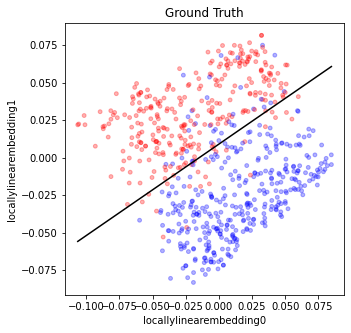

In [16]:
mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)
interval = [ mins[0], maxs[0], mins[1], maxs[1] ]

#--take Ngrid x Ngrid equally spaced points in [0,1]x[0,1]
Ngrid = 100
rangeX = np.linspace(mins[0],maxs[0],Ngrid)
rangeY = np.linspace(mins[1],maxs[1],Ngrid)
xx,yy = np.meshgrid(rangeX,rangeY)
grid_data = np.hstack( (xx.reshape([xx.size,1]), yy.reshape([yy.size,1]) ) )

Y_color = y_train.replace([0,1],['r','b']).values.ravel()
X_train.plot.scatter(x=X_train.columns[0],  y=X_train.columns[1], 
                     c=Y_color, s=60, figsize=(5, 5), marker='.', alpha=.3)

x2_surf = decision_surf2D(rangeX, model.coef_, model.intercept_, theta)
plt.plot(rangeX,x2_surf,'k')

plt.title('Ground Truth')
plt.show()

C:\Users\alfredo.cuesta\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
C:\Users\alfredo.cuesta\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


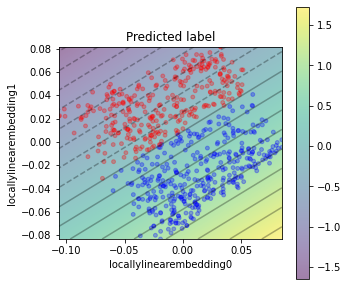

las líneas discontinuas indican valores negativos o cero


In [17]:
Y_color = yhat_train.replace([0,1],['r','b']).values.ravel()
X_train.plot.scatter(x=X_train.columns[0],  y=X_train.columns[1],  
                     c=Y_color, s=60, figsize=(5, 5), marker='.', alpha=.3)

#--predict the score according to each clf. 
#  REMEMBER that the nolin_clf needs to transform the input !
yhat_lin = model.predict(grid_data)
if model_type in ['LogisticRegression', 'Perceptron', 'LinearSVC', 'NuSVC']:
    yhat_lin = model.decision_function(grid_data)

plt.rcParams['figure.figsize'] = [10,10] #<- this makes the figures larger in Jupyter
origin = 'lower'

plt.imshow(yhat_lin.reshape([Ngrid,Ngrid]), 
           origin=origin, extent=interval, alpha=0.5)
plt.colorbar()
plt.contour(xx,yy,yhat_lin.reshape([Ngrid,Ngrid]), levels=20, 
            origin=origin, extent=interval, colors='k', alpha=0.3)
plt.title('Predicted label')
plt.show()
print("las líneas discontinuas indican valores negativos o cero")